<a href="https://colab.research.google.com/github/Ksianka/HW_Charts/blob/main/%5Bhw1%5D_hse_causasus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'colab' # or 'notebook' or 'colab' or 'jupyterlab'

from google.colab import drive

In [2]:
# connect google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df_hse = pd.read_excel('/content/drive/MyDrive/Charts_DIY.xlsx', 
                       sheet_name = 'HSE_graduate')

# перевернем данные в удобный формат
df_hse = (
    df_hse.
    set_index('Предмет')
    .unstack().to_frame().reset_index()
    .rename(columns = {0: 'Балл', 'level_0': 'Год'})
    .sort_values(by = ['Предмет', 'Год'])
    .reset_index(drop=True)
)

# поправим форматы данных в оптимальные
df_hse['Год'] = df_hse['Год'].astype(int).astype(str)
# пример данных для 1го предмета
df_hse.head()


,Год,Предмет,Балл
0,2012,Инфокоммуникационные технологии и системы связи,69.8
1,2013,Инфокоммуникационные технологии и системы связи,78.2
2,2014,Инфокоммуникационные технологии и системы связи,74.5
3,2015,Инфокоммуникационные технологии и системы связи,75.0
4,2016,Инфокоммуникационные технологии и системы связи,81.0


In [4]:
# добавим изменение с 2012 года
df_hse['Изменение балла год к году'] = df_hse['Балл'] - df_hse['Балл'].shift()
df_hse['Изменение балла год к году'] = df_hse['Изменение балла год к году'].fillna(0)
df_hse['Изменение балла год к году'] = np.where(df_hse['Год'] == '2012', 0, 
                                             df_hse['Изменение балла год к году'])

In [5]:
def filter_out_subject(df, select_subject):
    
    subject = df.Предмет
    
    if subject == select_subject:
        return subject
    return 'Остальные предметы'

df_hse['Категория'] = df_hse.apply(filter_out_subject, 
                                 select_subject = 'Прикладная математика и информатика', 
                                 axis = 1)

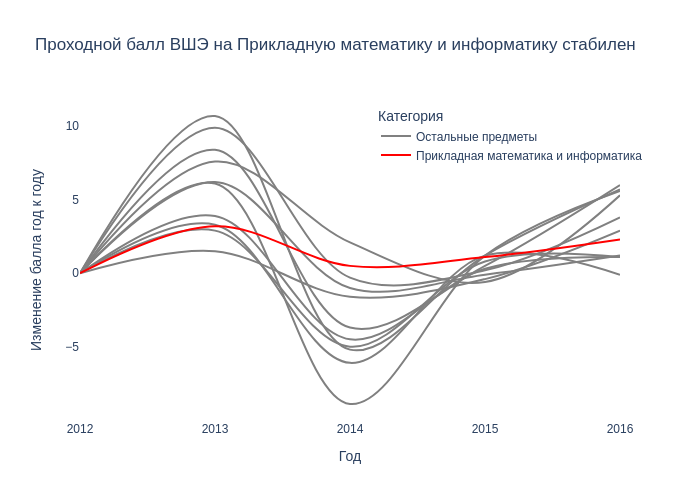

In [10]:
fig = px.line(df_hse, x="Год", y="Изменение балла год к году", color="Категория", 
              line_group="Предмет", hover_name="Предмет",
        line_shape="spline", render_mode="png", 
        color_discrete_sequence = ['grey', 'red'], 
        title = 'Проходной балл ВШЭ на Прикладную математику и информатику стабилен')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="center",
    x=0.80
))

fig.show('png')